In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [32]:
def plot_graphs(graphs, figsize=14, dotsize=20):
    """Utility to plot a lot of graphs from an array of graphs.
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=dotsize)
        print('.', end='')

#plot_graphs([[(0,1),(1,2),(1,3)]])

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]
[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
[(0, 1), (0, 2), (0, 3), (1, 2)]
[(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
[(0, 1), (0, 2), (0, 3), (1, 3)]
[(0, 1), (0, 2), (0, 3), (2, 3)]
[(0, 1), (0, 2), (0, 3)]
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]
[(0, 1), (0, 2), (1, 2), (1, 3)]
[(0, 1), (0, 2), (1, 2), (2, 3)]
[(0, 1), (0, 2), (1, 2)]
[(0, 1), (0, 2), (1, 3), (2, 3)]
[(0, 1), (0, 2), (1, 3)]
[(0, 1), (0, 2), (2, 3)]
[(0, 1), (0, 2)]
[(0, 1), (0, 3), (1, 2), (1, 3), (2, 3)]
[(0, 1), (0, 3), (1, 2), (1, 3)]
[(0, 1), (0, 3), (1, 2), (2, 3)]
[(0, 1), (0, 3), (1, 2)]
[(0, 1), (0, 3), (1, 3), (2, 3)]
[(0, 1), (0, 3), (1, 3)]
[(0, 1), (0, 3), (2, 3)]
[(0, 1), (0, 3)]
[(0, 1), (1, 2), (1, 3), (2, 3)]
[(0, 1), (1, 2), (1, 3)]
[(0, 1), (1, 2), (2, 3)]
[(0, 1), (1, 2)]
[(0, 1), (1, 3), (2, 3)]
[(0, 1), (1, 3)]
[(0, 1), (2, 3)]
[(0, 1)]
Drawing...
................................

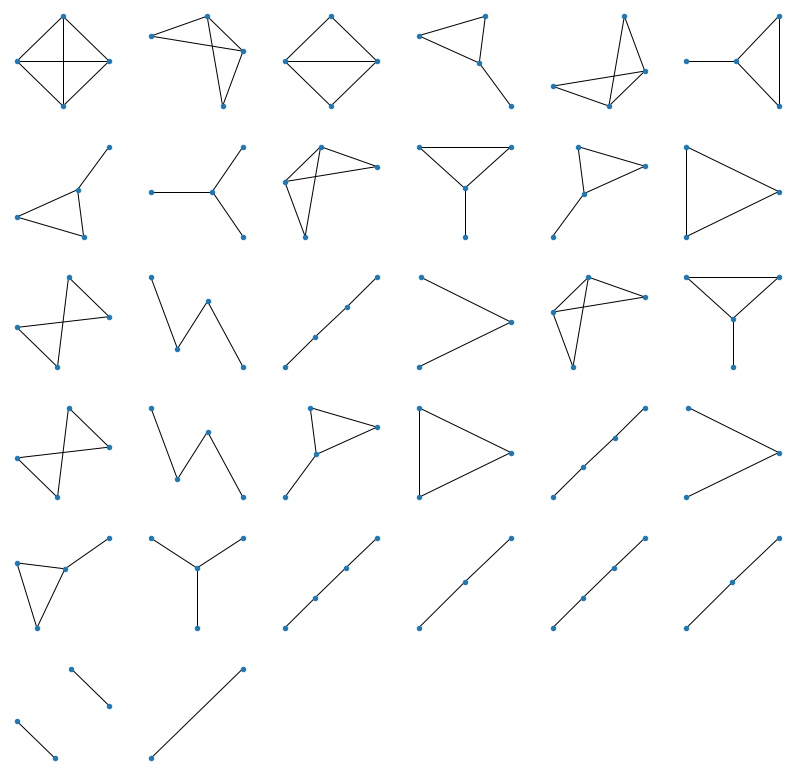

In [33]:
def make_graphs(n=2, i=None, j=None):
    """Make a graph recursively, by either including, or skipping each edge.
    Edges are given in lexicographical order by construction."""
    out = []
    if i is None: # First call
        out  = [[(0,1)]+r for r in make_graphs(n=n, i=0, j=1)]
    elif j<n-1:
        out += [[(i,j+1)]+r for r in make_graphs(n=n, i=i, j=j+1)]
        out += [          r for r in make_graphs(n=n, i=i, j=j+1)]
    elif i<n-1:
        out = make_graphs(n=n, i=i+1, j=i+1)
    else:
        out = [[]]
    return out

gs = make_graphs(5)
for g in gs: print(g)
print('Drawing...')
plot_graphs(gs)

In [34]:
def perm(n, s=None):
    """All permutations of n elements."""
    if s is None: return perm(n, tuple(range(n)))
    if not s: return [[]]
    return [[i]+p for i in s for p in perm(n, tuple([k for k in s if k!=i]))]

perm(5)

[[0, 1, 2, 3, 4],
 [0, 1, 2, 4, 3],
 [0, 1, 3, 2, 4],
 [0, 1, 3, 4, 2],
 [0, 1, 4, 2, 3],
 [0, 1, 4, 3, 2],
 [0, 2, 1, 3, 4],
 [0, 2, 1, 4, 3],
 [0, 2, 3, 1, 4],
 [0, 2, 3, 4, 1],
 [0, 2, 4, 1, 3],
 [0, 2, 4, 3, 1],
 [0, 3, 1, 2, 4],
 [0, 3, 1, 4, 2],
 [0, 3, 2, 1, 4],
 [0, 3, 2, 4, 1],
 [0, 3, 4, 1, 2],
 [0, 3, 4, 2, 1],
 [0, 4, 1, 2, 3],
 [0, 4, 1, 3, 2],
 [0, 4, 2, 1, 3],
 [0, 4, 2, 3, 1],
 [0, 4, 3, 1, 2],
 [0, 4, 3, 2, 1],
 [1, 0, 2, 3, 4],
 [1, 0, 2, 4, 3],
 [1, 0, 3, 2, 4],
 [1, 0, 3, 4, 2],
 [1, 0, 4, 2, 3],
 [1, 0, 4, 3, 2],
 [1, 2, 0, 3, 4],
 [1, 2, 0, 4, 3],
 [1, 2, 3, 0, 4],
 [1, 2, 3, 4, 0],
 [1, 2, 4, 0, 3],
 [1, 2, 4, 3, 0],
 [1, 3, 0, 2, 4],
 [1, 3, 0, 4, 2],
 [1, 3, 2, 0, 4],
 [1, 3, 2, 4, 0],
 [1, 3, 4, 0, 2],
 [1, 3, 4, 2, 0],
 [1, 4, 0, 2, 3],
 [1, 4, 0, 3, 2],
 [1, 4, 2, 0, 3],
 [1, 4, 2, 3, 0],
 [1, 4, 3, 0, 2],
 [1, 4, 3, 2, 0],
 [2, 0, 1, 3, 4],
 [2, 0, 1, 4, 3],
 [2, 0, 3, 1, 4],
 [2, 0, 3, 4, 1],
 [2, 0, 4, 1, 3],
 [2, 0, 4, 3, 1],
 [2, 1, 0, 3, 4],
 [2, 1, 0,

In [35]:
def permute(g, n):
    """Create a set of all possible isomorphic codes for a graph,
    as nice hashable tuples. All edges are i<j, and sorted lexicographically."""
    ps = perm(n)
    out = set([])
    for p in ps:
        out.add(tuple(sorted([(p[i],p[j]) if p[i]<p[j] else (p[j],p[i]) for i,j in g])))
    return list(out)

permute([(0, 1), (0, 2)], 5)

[((1, 2), (1, 3)),
 ((0, 4), (3, 4)),
 ((1, 2), (1, 4)),
 ((2, 3), (2, 4)),
 ((0, 3), (2, 3)),
 ((1, 3), (3, 4)),
 ((0, 1), (1, 3)),
 ((0, 4), (2, 4)),
 ((1, 3), (2, 3)),
 ((0, 1), (0, 2)),
 ((0, 1), (1, 4)),
 ((0, 2), (0, 3)),
 ((0, 1), (0, 3)),
 ((0, 3), (1, 3)),
 ((1, 4), (3, 4)),
 ((2, 4), (3, 4)),
 ((0, 3), (3, 4)),
 ((1, 2), (2, 3)),
 ((0, 2), (0, 4)),
 ((0, 1), (0, 4)),
 ((1, 2), (2, 4)),
 ((0, 4), (1, 4)),
 ((1, 4), (2, 4)),
 ((0, 2), (1, 2)),
 ((0, 2), (2, 3)),
 ((0, 1), (1, 2)),
 ((1, 3), (1, 4)),
 ((0, 3), (0, 4)),
 ((2, 3), (3, 4)),
 ((0, 2), (2, 4))]

In [36]:
def connected(g):
    """Check if the graph is fully connected, with Union-Find."""
    nodes = set([i for e in g for i in e])
    roots = {node: node for node in nodes}

    def _root(node, depth=0):
        if node==roots[node]: return node, depth
        else: return _root(roots[node], depth+1)

    for i,j in g:
        ri,di = _root(i)
        rj,dj = _root(j)
        if ri==rj: continue
        if di<=dj: roots[ri] = rj
        else:      roots[rj] = ri
    return len(set([_root(node)[0] for node in nodes]))==1

assert connected([(0, 1), (0, 2), (1, 3)])
assert not connected([(0, 1), (2, 3)])

In [37]:
def filter(gs, target_nv):
    """Filter all improper graphs: those with not enough nodes,
    those not fully connected, and those isomorphic to previously considered."""
    mem = set({})
    gs2 = []
    for g in gs:
        nv = len(set([i for e in g for i in e]))
        if nv != target_nv:
            continue
        if not connected(g):
            continue
        if tuple(g) not in mem:
            gs2.append(g)
            mem |= set(permute(g, target_nv))
        #print('\n'.join([str(a) for a in mem]))
    return gs2

filter(gs, 5)
print(gs)

[[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)], [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)], [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)], [(0, 1), (0, 2), (0, 3), (1, 2)], [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)], [(0, 1), (0, 2), (0, 3), (1, 3)], [(0, 1), (0, 2), (0, 3), (2, 3)], [(0, 1), (0, 2), (0, 3)], [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)], [(0, 1), (0, 2), (1, 2), (1, 3)], [(0, 1), (0, 2), (1, 2), (2, 3)], [(0, 1), (0, 2), (1, 2)], [(0, 1), (0, 2), (1, 3), (2, 3)], [(0, 1), (0, 2), (1, 3)], [(0, 1), (0, 2), (2, 3)], [(0, 1), (0, 2)], [(0, 1), (0, 3), (1, 2), (1, 3), (2, 3)], [(0, 1), (0, 3), (1, 2), (1, 3)], [(0, 1), (0, 3), (1, 2), (2, 3)], [(0, 1), (0, 3), (1, 2)], [(0, 1), (0, 3), (1, 3), (2, 3)], [(0, 1), (0, 3), (1, 3)], [(0, 1), (0, 3), (2, 3)], [(0, 1), (0, 3)], [(0, 1), (1, 2), (1, 3), (2, 3)], [(0, 1), (1, 2), (1, 3)], [(0, 1), (1, 2), (2, 3)], [(0, 1), (1, 2)], [(0, 1), (1, 3), (2, 3)], [(0, 1), (1, 3)], [(0, 1), (2, 3)], [(0, 1)]]


Building...
Filtering...
Drawing 6 graphs...
......

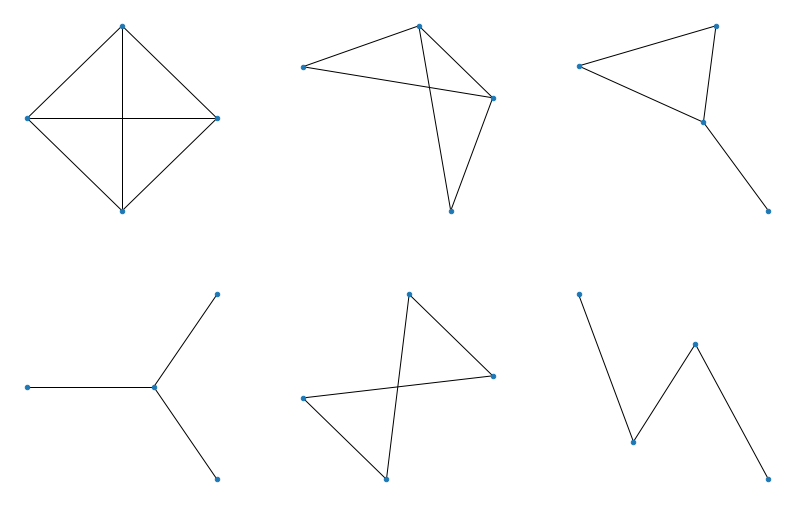

In [38]:
NV = 5
print('Building...')
gs = make_graphs(NV)
print('Filtering...')
gs = filter(gs, NV)
print(f'Drawing {len(gs)} graphs...')
plot_graphs(gs, figsize=14, dotsize=20)